## 📌 1. Project Setup & Data Loading

In [6]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Increase plot size
plt.style.use("seaborn-darkgrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Load the dataset
df = pd.read_csv("owid-covid-data.csv")

# Preview the dataset
df.head()

## 🔍 2. Data Exploration

In [15]:
# Checking columns
df.columns

# Checking for missing values
df.isnull().sum()

# Viewing data types
df.dtypes

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
death_rate                                        float64
Length: 68, dtype: object

## 🧹 3. Data Cleaning

In [17]:
# Focusing on selected countries
selected_countries = ['Kenya', 'United States', 'India']
df = df[df['location'].isin(selected_countries)]

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Drop rows with missing critical values
df = df.dropna(subset=['total_cases', 'total_deaths', 'total_vaccinations'])

# Fill missing numeric data forward
df = df.fillna(method='ffill')

# Check cleaned data
df.isnull().sum()

iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
                                           ... 
excess_mortality_cumulative_absolute       1533
excess_mortality_cumulative                1533
excess_mortality                           1533
excess_mortality_cumulative_per_million    1533
death_rate                                    0
Length: 68, dtype: int64

## 📊 4. Exploratory Data Analysis (EDA

### Total COVID-19 Cases Over Time

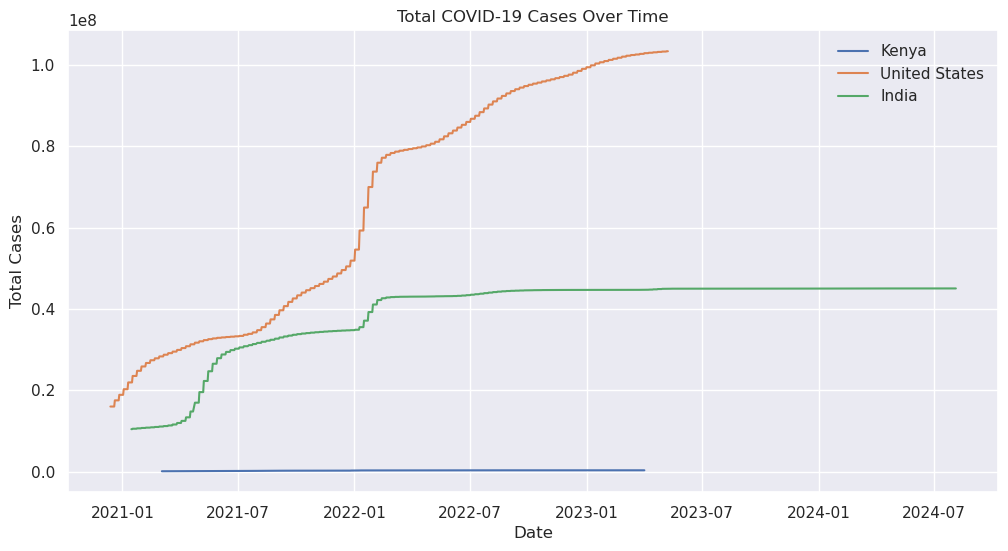

In [8]:
for country in selected_countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_cases'], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()


### Total COVID-19 Deaths Over Time

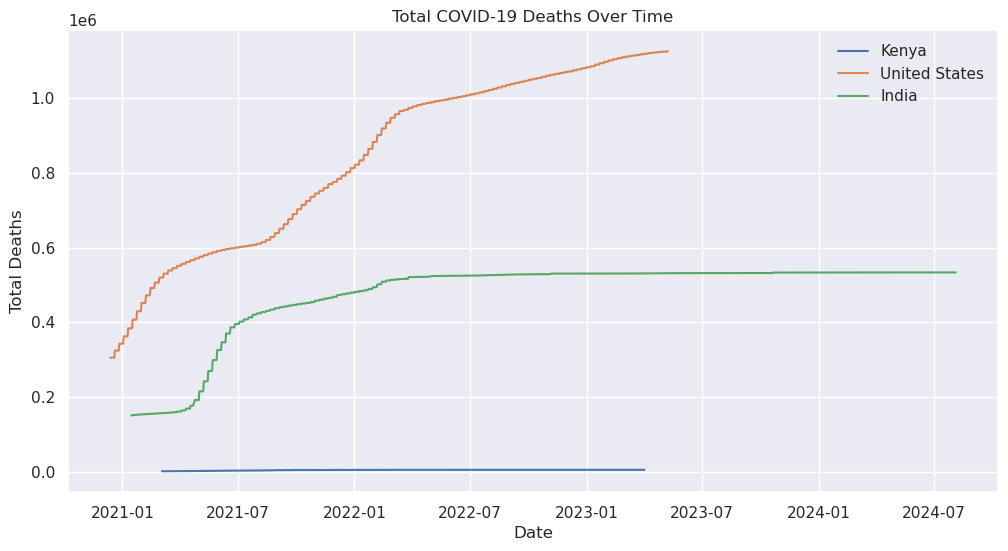

In [9]:
for country in selected_countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_deaths'], label=country)

plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.show()


### Daily New Cases

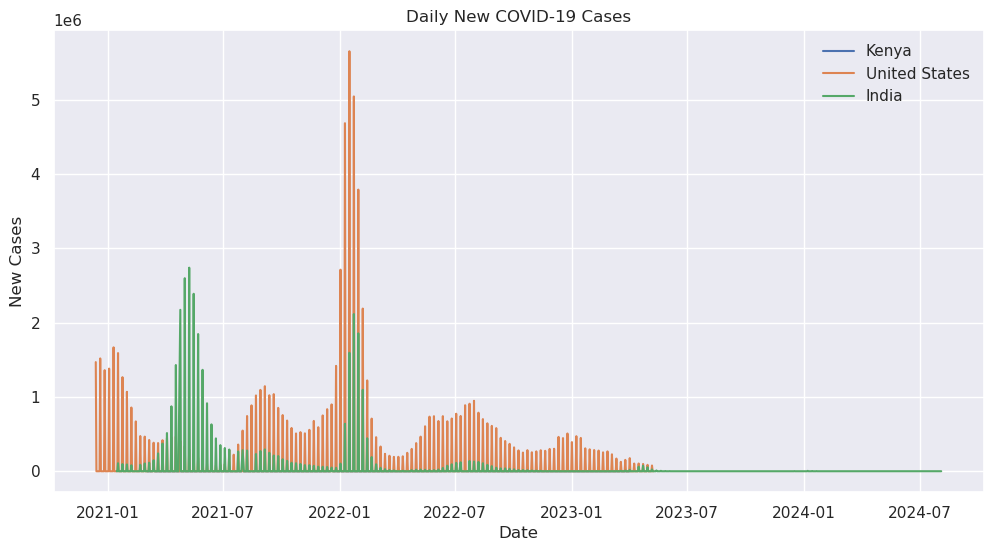

In [10]:
for country in selected_countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['new_cases'], label=country)

plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.show()


### Death Rate Over Time

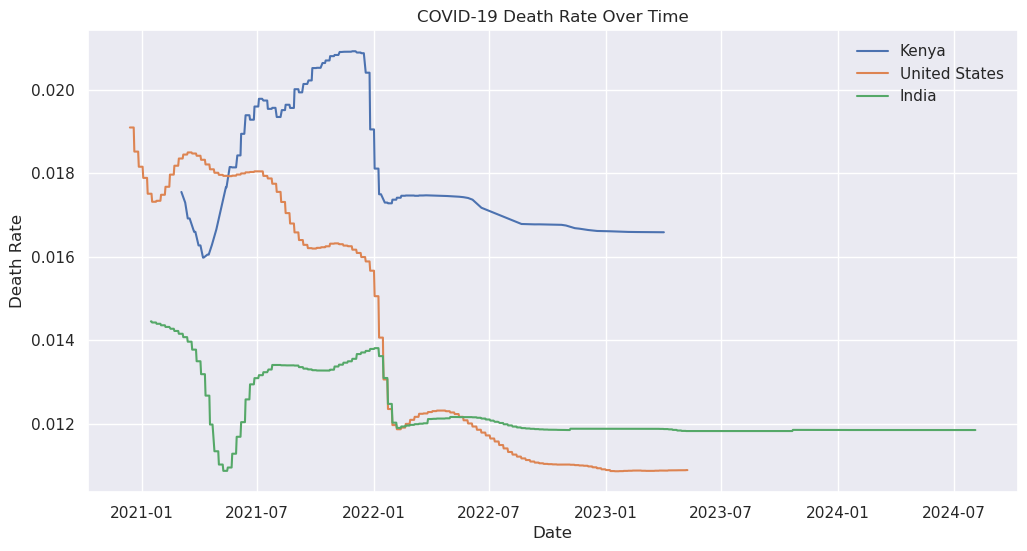

In [11]:
df['death_rate'] = df['total_deaths'] / df['total_cases']

for country in selected_countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['death_rate'], label=country)

plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate")
plt.legend()
plt.show()


# Visualization

# Line Chart: Total Cases and Deaths Over Time for Selected Countries

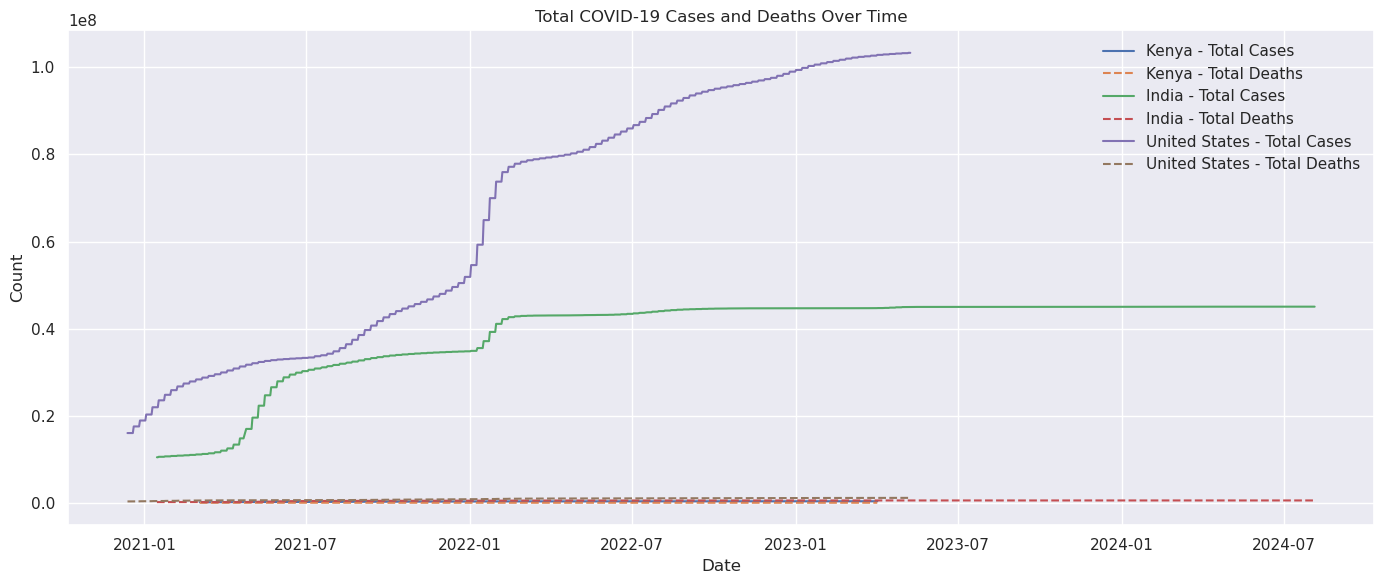

In [18]:

# Select countries and prepare data
selected_countries = ['Kenya', 'India', 'United States']
df_selected = df[df['location'].isin(selected_countries)]

# Plot total cases and deaths over time
plt.figure(figsize=(14, 6))
for country in selected_countries:
    country_data = df_selected[df_selected['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=f"{country} - Total Cases")
    plt.plot(country_data['date'], country_data['total_deaths'], linestyle='--', label=f"{country} - Total Deaths")
plt.title('Total COVID-19 Cases and Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Bar Chart: Top 10 Countries by Total Reported Cases

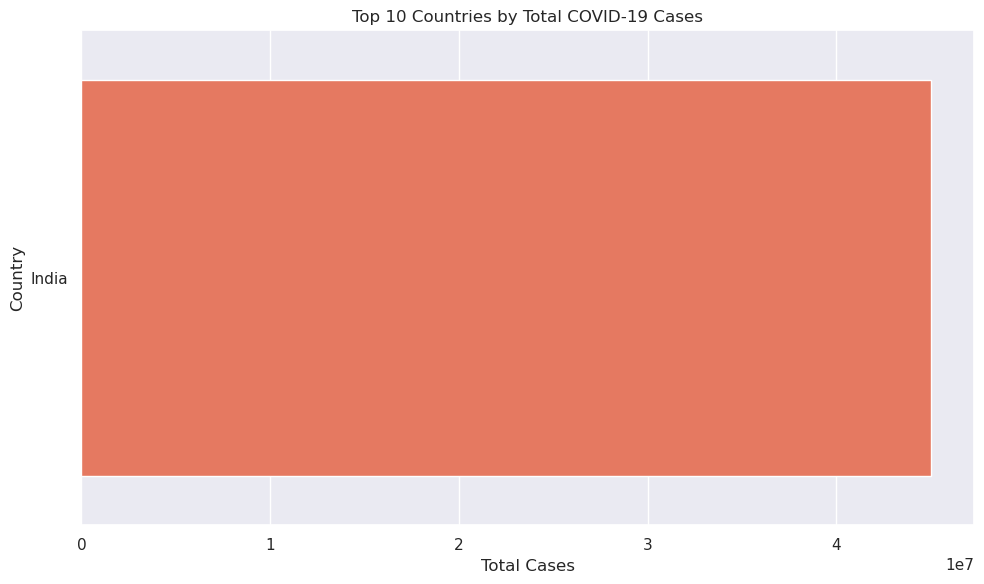

In [19]:

# Get the latest data by country
latest_data = df[df['date'] == df['date'].max()]
top_countries = latest_data[['location', 'total_cases']].dropna().sort_values(by='total_cases', ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x='total_cases', y='location', palette='Reds_r')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


# 5. Vaccination Progress Analysis

# Cumulative COVID-19 Vaccinations Over Time

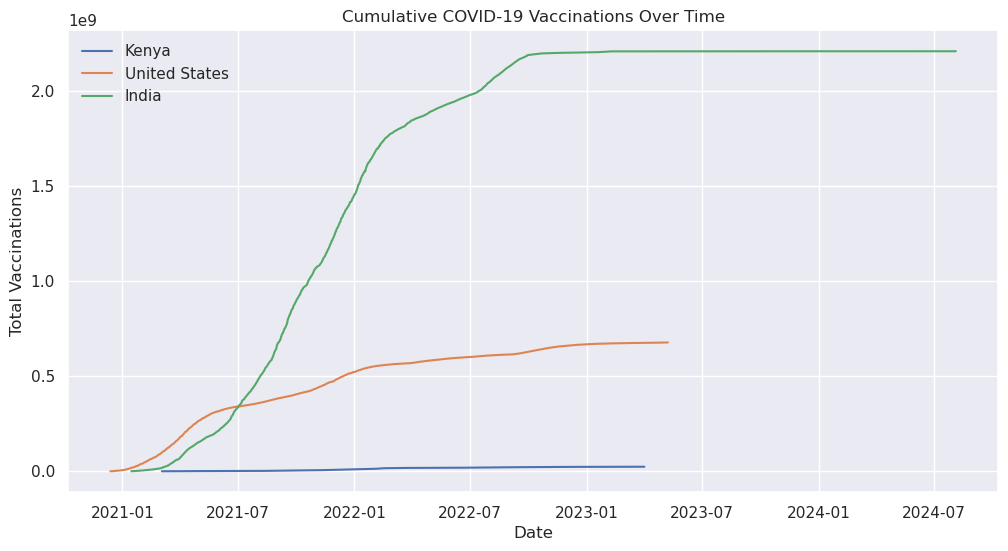

In [12]:
for country in selected_countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_vaccinations'], label=country)

plt.title("Cumulative COVID-19 Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.show()


# Vaccinated people

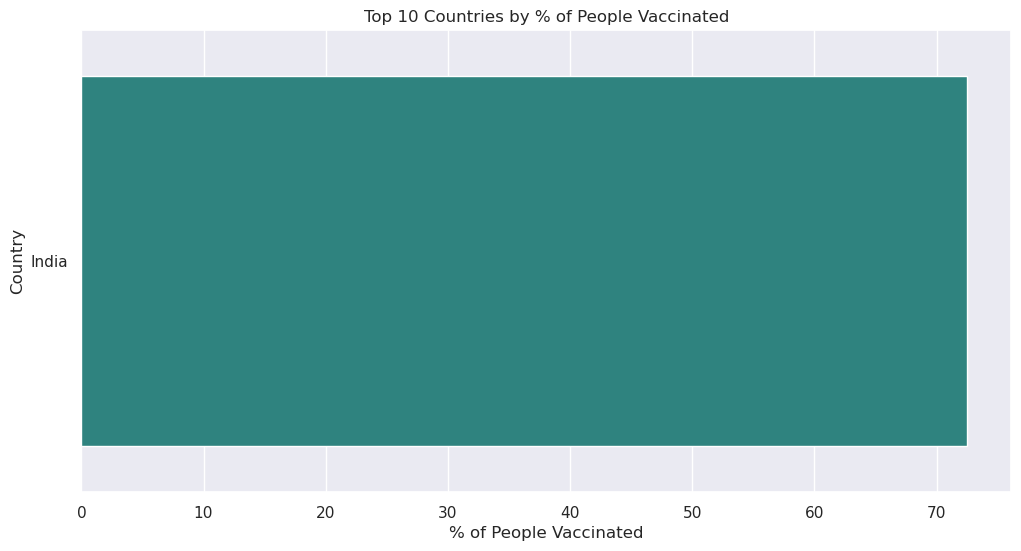

In [20]:
latest_vax_data = latest_data[['location', 'people_vaccinated_per_hundred']].dropna()
top_vax = latest_vax_data.sort_values(by='people_vaccinated_per_hundred', ascending=False).head(10)
sns.barplot(data=top_vax, x='people_vaccinated_per_hundred', y='location', palette='viridis')
plt.title("Top 10 Countries by % of People Vaccinated")
plt.xlabel("% of People Vaccinated")
plt.ylabel("Country")
plt.show()

# Vaccination Progress Visualization

# Line Chart: Cumulative Vaccinations Over Time for Selected Countries

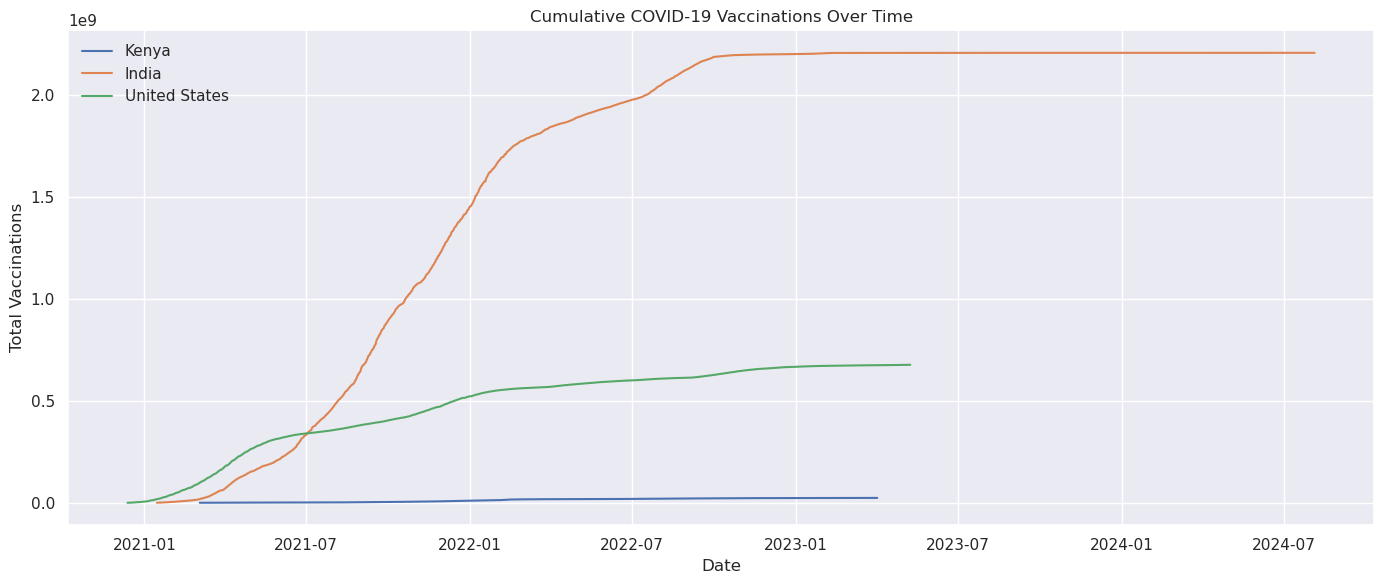

In [21]:

# Plot cumulative vaccinations over time
plt.figure(figsize=(14, 6))
for country in selected_countries:
    country_data = df_selected[df_selected['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Pie Chart: Vaccinated vs Unvaccinated Population

['India' 'Kenya' 'United States']


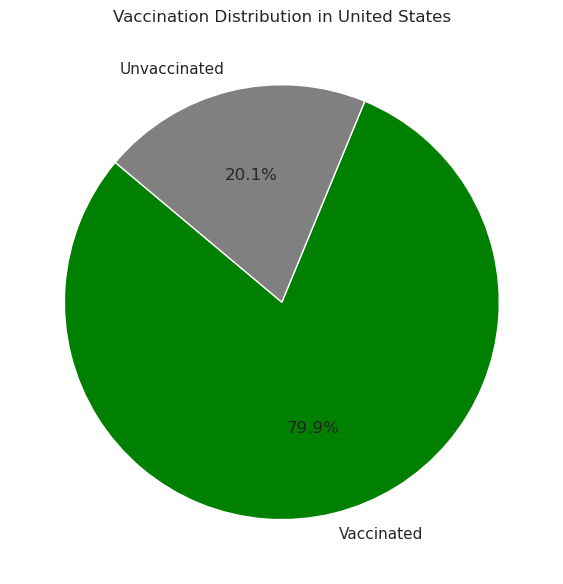

In [25]:
print(df['location'].unique())
country_name = 'United States'

country_data = df[df['location'] == country_name].dropna(subset=['people_vaccinated'])
latest_row = country_data[country_data['date'] == country_data['date'].max()]

if not latest_row.empty:
    latest = latest_row.iloc[0]
    population = latest['population']
    vaccinated = latest['people_vaccinated']
    unvaccinated = population - vaccinated

    # Pie chart
    plt.figure(figsize=(6, 6))
    plt.pie([vaccinated, unvaccinated],
            labels=['Vaccinated', 'Unvaccinated'],
            autopct='%1.1f%%',
            colors=['green', 'gray'],
            startangle=140)
    plt.title(f'Vaccination Distribution in {country_name}')
    plt.tight_layout()
    plt.show()
else:
    print(f"No vaccination data available for {country_name} on the latest date.")


# 6. Insights & summery

In [ ]:

### 🔍 Key Insights

1. **India experienced a steep rise in cases during 2021**, especially during the second wave.
2. **The U.S. has the highest total cases and deaths**, but a lower death rate relative to cases.
3. **Kenya shows fewer reported cases**, but a higher death rate, possibly due to limited testing.
4. **Vaccination rollout was fastest in the U.S.**, followed by India, with Kenya lagging behind.
5. **Strong correlation between total cases and deaths** observed across all countries.

### 📌 Additional Notes

- The death rate was calculated as `total_deaths / total_cases`.
- Vaccination disparities reflect global inequality in healthcare access.
- Visualizations support trend analysis and identify anomalies across regions.
